In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor


In [17]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 162.5 kB/s eta 0:12:49
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.1/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 326.8 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 374.6 kB/s eta 0:05:34
   ---------------------------------------- 0.1/124.9 MB 374.6 kB/s eta 0:05:34
   ----------

In [2]:
data =pd.read_csv("Housing.csv")

In [79]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# data cleaning
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [83]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
labelEncoder = LabelEncoder()
colString =  data.select_dtypes(include=["object"]).columns
for i in colString:
    data[i]= labelEncoder.fit_transform(data[i])

In [86]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


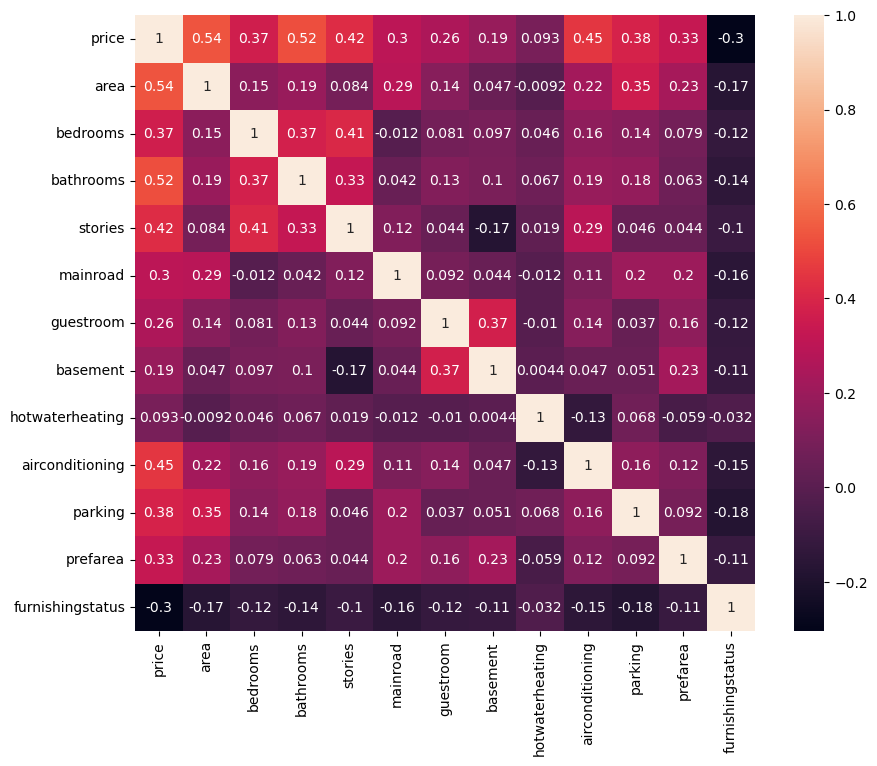

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot =True)
plt.show()

<Axes: >

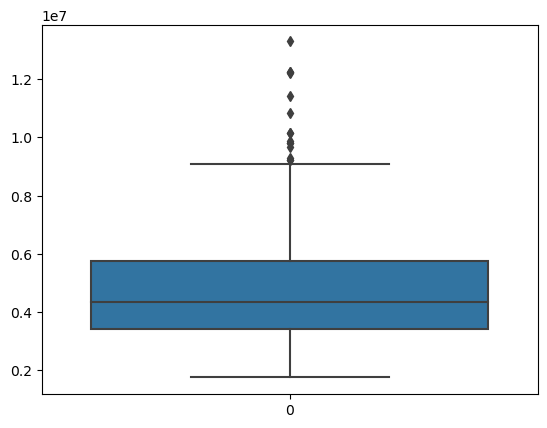

In [88]:
sns.boxplot(data.price)

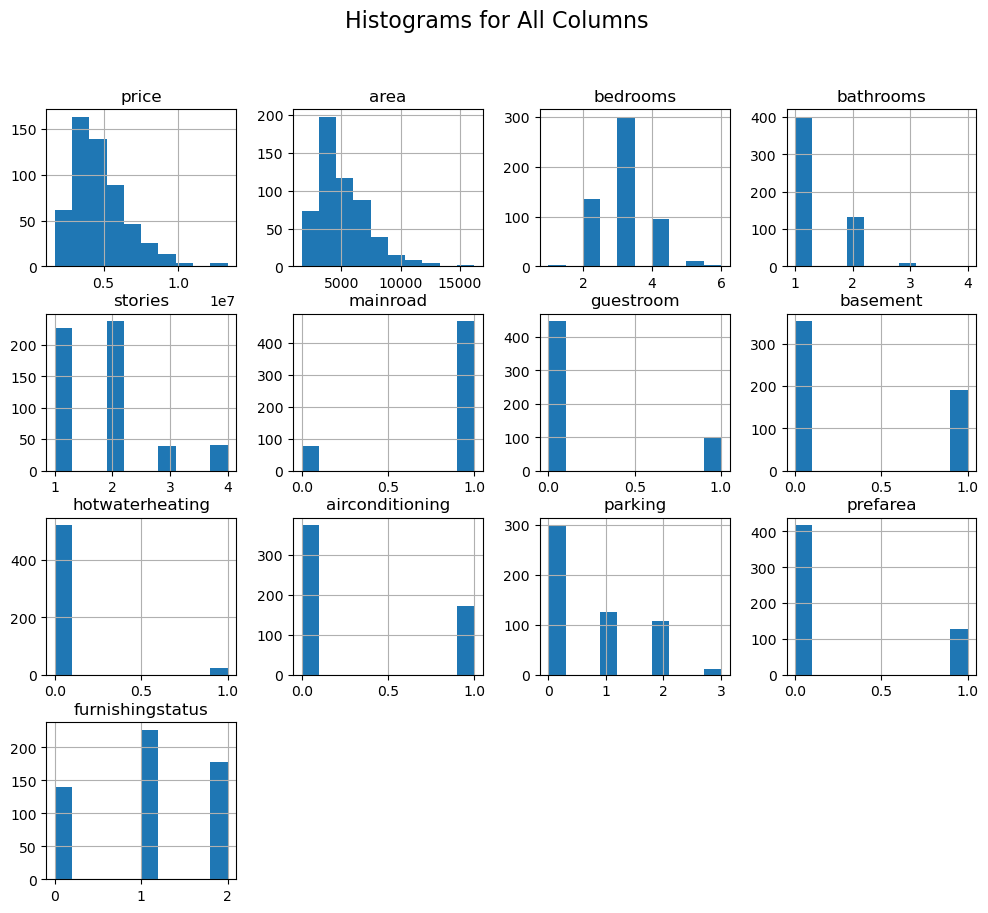

In [8]:

data.hist(figsize = (12,10))
plt.suptitle("Histograms for All Columns", fontsize=16) 
plt.show()

In [9]:
# feature and target
X = data.drop(columns="price")
Y = data["price"]

In [28]:
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
scaler = StandardScaler()
x_trainData= scaler.fit_transform(XTrain)
print(x_trainData)

[[-1.17687206  0.03201512 -0.58376171 ... -0.78680611  1.78670302
   1.21990719]
 [ 1.23991283 -1.36384432 -0.58376171 ...  0.40020934 -0.5596901
  -1.40665841]
 [-0.90755979 -1.36384432 -0.58376171 ... -0.78680611 -0.5596901
   1.21990719]
 ...
 [-0.54457369  0.03201512 -0.58376171 ... -0.78680611 -0.5596901
  -1.40665841]
 [-1.53938979 -1.36384432 -0.58376171 ... -0.78680611 -0.5596901
  -0.09337561]
 [-0.40406294  1.42787457 -0.58376171 ... -0.78680611 -0.5596901
  -1.40665841]]


In [21]:
LRModel = XBGRegressor()

In [32]:
LRModel.fit(x_trainData,YTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
LRPr=  LRModel.predict(x_trainData)

In [52]:
LRModel.score(x_trainData,YTrain)

0.9968795625957642

In [36]:
#  R Square Root

score_1 = metrics.r2_score(YTrain,LRPr)
print(score_1)

0.9968795625957642


In [38]:
# Mean Absolute Error

mean_error = metrics.mean_absolute_error(YTrain,LRPr)
print(mean_error)

59136.664277522934


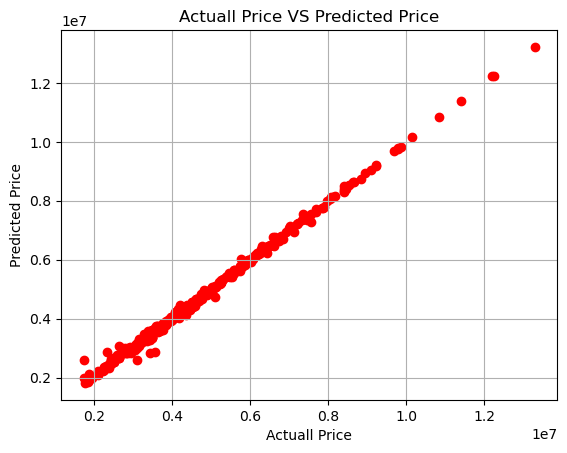

In [50]:
# Visualize data

plt.scatter(YTrain,LRPr,c="red")
plt.xlabel("Actuall Price")
plt.ylabel("Predicted Price")
plt.title("Actuall Price VS Predicted Price")
plt.grid()
plt.show()